In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing, model_selection, metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:/Users/thipp/OneDrive/Desktop/Data sets/energydata_complete.csv")

In [3]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [7]:
data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [8]:
data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [9]:
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [38]:
data = data.set_index('date')

In [39]:
data['month'] = data.index.month
data['weekday'] = data.index.weekday
data['hour'] = data.index.hour
data['week'] = data.index.week

In [40]:
data.head(10)

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,...,rh_out,windspeed,visibility,tdewpoint,rv1,rv2,month,weekday,hour,week
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,45.566667,...,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,1,0,17,2
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,45.992500,...,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,1,0,17,2
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,45.890000,...,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,1,0,17,2
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,45.723333,...,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,1,0,17,2
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,45.530000,...,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,1,0,17,2
2016-01-11 17:50:00,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,45.730000,...,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484,1,0,17,2
2016-01-11 18:00:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,45.790000,...,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763,1,0,18,2
2016-01-11 18:10:00,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,45.863333,...,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890,1,0,18,2
2016-01-11 18:20:00,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,45.790000,...,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702,1,0,18,2


The number of the 0,1% top values of appliances' load is 19 and they have power load higher than 790 Wh.


Text(0.5, 1.0, 'Appliances energy consumption distribution')

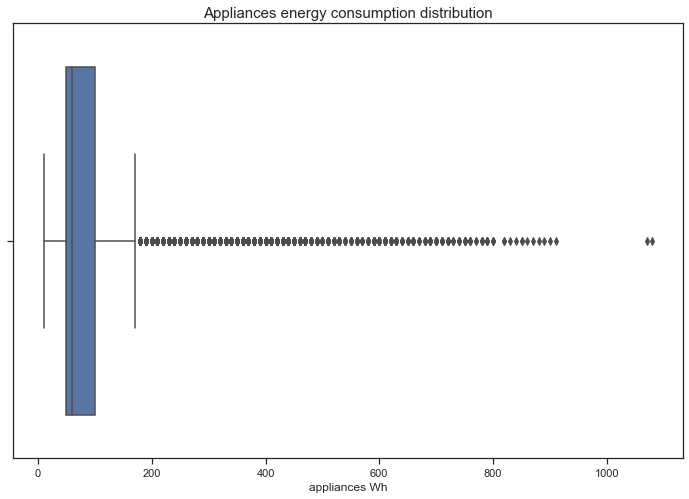

In [44]:
sorted_appliances = data.sort_values('appliances',ascending=False)
print("The number of the 0,1% top values of appliances' load is",
      len(sorted_appliances.head(len(sorted_appliances)//1000)),"and they have power load higher than",
      sorted_appliances.appliances[19], "Wh.")

# boxplot appliances
plt.figure(figsize=(12,8))
sns.boxplot(x="appliances", data=data)
plt.xlabel('appliances Wh', fontsize=12)
plt.title("Appliances energy consumption distribution", fontsize=15)

In [47]:
# Outliers removal
df = data.drop(data[(data.appliances>790)|(data.appliances<0)].index)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19718 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   appliances   19718 non-null  int64  
 1   lights       19718 non-null  int64  
 2   t1           19718 non-null  float64
 3   rh_1         19718 non-null  float64
 4   t2           19718 non-null  float64
 5   rh_2         19718 non-null  float64
 6   t3           19718 non-null  float64
 7   rh_3         19718 non-null  float64
 8   t4           19718 non-null  float64
 9   rh_4         19718 non-null  float64
 10  t5           19718 non-null  float64
 11  rh_5         19718 non-null  float64
 12  t6           19718 non-null  float64
 13  rh_6         19718 non-null  float64
 14  t7           19718 non-null  float64
 15  rh_7         19718 non-null  float64
 16  t8           19718 non-null  float64
 17  rh_8         19718 non-null  float64
 18  t9         

In [48]:
df=df.drop("month",axis=1)
df=df.drop("weekday",axis=1)
df=df.drop("week",axis=1)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19718 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   appliances   19718 non-null  int64  
 1   lights       19718 non-null  int64  
 2   t1           19718 non-null  float64
 3   rh_1         19718 non-null  float64
 4   t2           19718 non-null  float64
 5   rh_2         19718 non-null  float64
 6   t3           19718 non-null  float64
 7   rh_3         19718 non-null  float64
 8   t4           19718 non-null  float64
 9   rh_4         19718 non-null  float64
 10  t5           19718 non-null  float64
 11  rh_5         19718 non-null  float64
 12  t6           19718 non-null  float64
 13  rh_6         19718 non-null  float64
 14  t7           19718 non-null  float64
 15  rh_7         19718 non-null  float64
 16  t8           19718 non-null  float64
 17  rh_8         19718 non-null  float64
 18  t9         

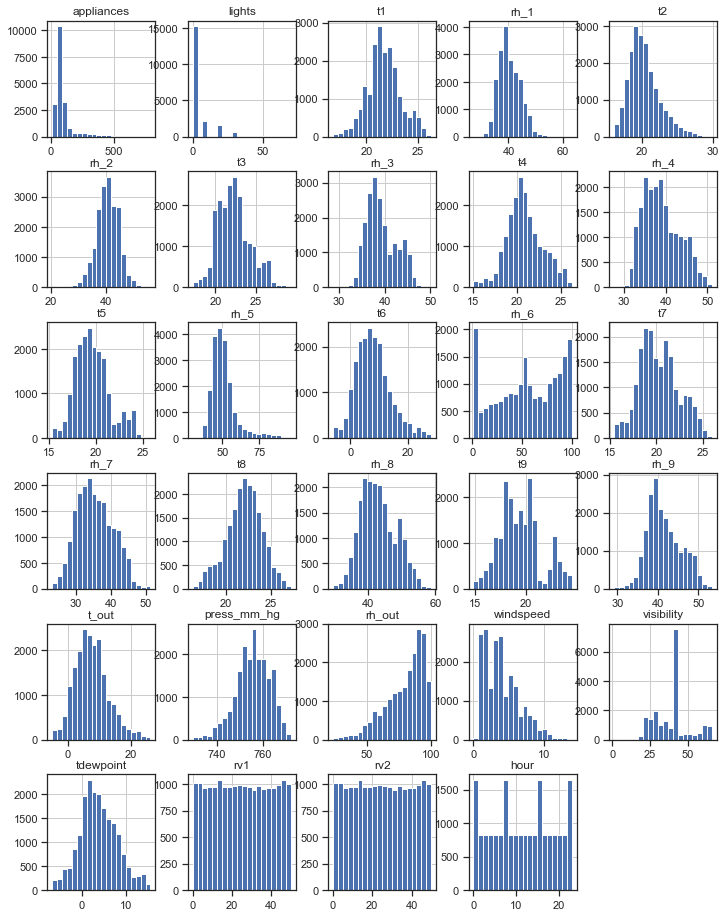

In [50]:
df.hist(bins = 20 , figsize= (12,16)) ;

<AxesSubplot:ylabel='Density'>

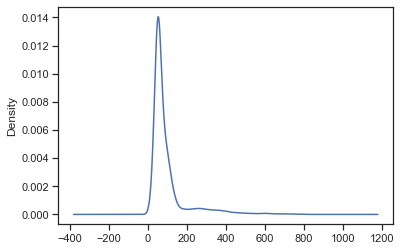

In [51]:
df.appliances.plot(kind='kde')

In [52]:
df.corr()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,...,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2,hour
appliances,1.000000,0.198201,0.058996,0.087890,0.122590,-0.058680,0.088211,0.037644,0.043280,0.017365,...,-0.052405,0.102671,-0.039059,-0.155689,0.090528,-0.004157,0.017180,-0.012404,-0.012404,0.219468
lights,0.198201,1.000000,-0.022727,0.107266,-0.004990,0.051428,-0.096397,0.131253,-0.008049,0.115113,...,-0.008539,-0.073683,-0.011491,0.068215,0.060741,0.019347,-0.035632,0.000627,0.000627,0.255219
t1,0.058996,-0.022727,1.000000,0.163976,0.836827,-0.002565,0.892423,-0.028357,0.876984,0.098001,...,0.071834,0.682862,-0.149993,-0.345160,-0.087680,-0.075679,0.571435,-0.006107,-0.006107,0.178995
rh_1,0.087890,0.107266,0.163976,1.000000,0.269801,0.797675,0.253182,0.844803,0.105981,0.880435,...,0.763981,0.340586,-0.293908,0.274344,0.204946,-0.020756,0.639078,-0.000530,-0.000530,0.018695
t2,0.122590,-0.004990,0.836827,0.269801,1.000000,-0.165586,0.735194,0.121740,0.761939,0.231678,...,0.157388,0.792340,-0.132719,-0.505242,0.052724,-0.069587,0.582594,-0.010844,-0.010844,0.254971
rh_2,-0.058680,0.051428,-0.002565,0.797675,-0.165586,1.000000,0.137318,0.678418,-0.047445,0.721560,...,0.676492,0.033439,-0.255419,0.585199,0.068929,-0.004746,0.499169,0.006183,0.006183,-0.183140
t3,0.088211,-0.096397,0.892423,0.253182,0.735194,0.137318,1.000000,-0.011087,0.852852,0.122852,...,0.134633,0.699277,-0.189364,-0.281216,-0.101017,-0.101767,0.645966,-0.005355,-0.005355,0.037630
rh_3,0.037644,0.131253,-0.028357,0.844803,0.121740,0.678418,-0.011087,1.000000,-0.140469,0.899024,...,0.833593,0.118229,-0.233397,0.356199,0.263070,0.017251,0.414461,-0.000403,-0.000403,-0.052265
t4,0.043280,-0.008049,0.876984,0.105981,0.761939,-0.047445,0.852852,-0.140469,1.000000,-0.048743,...,-0.025754,0.663333,-0.074852,-0.388413,-0.185935,-0.104360,0.519326,-0.001759,-0.001759,0.088623
rh_4,0.017365,0.115113,0.098001,0.880435,0.231678,0.721560,0.122852,0.899024,-0.048743,1.000000,...,0.856563,0.293228,-0.250814,0.336899,0.300231,0.002871,0.616532,-0.001736,-0.001736,-0.018885


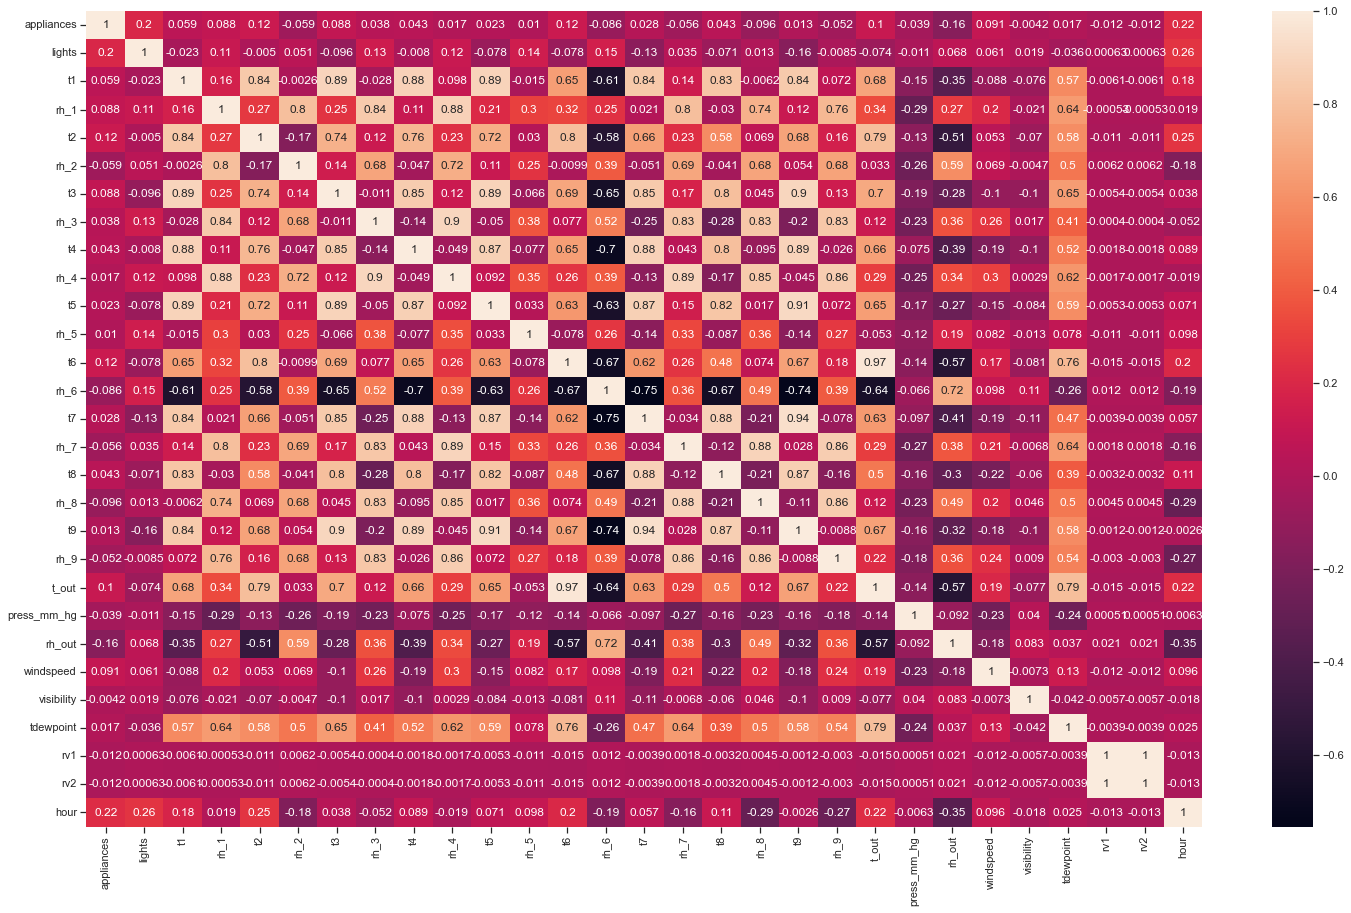

In [53]:
plt.figure(figsize=(25,15))
dataplot = sns.heatmap(df.corr(),annot=True)
plt.show()

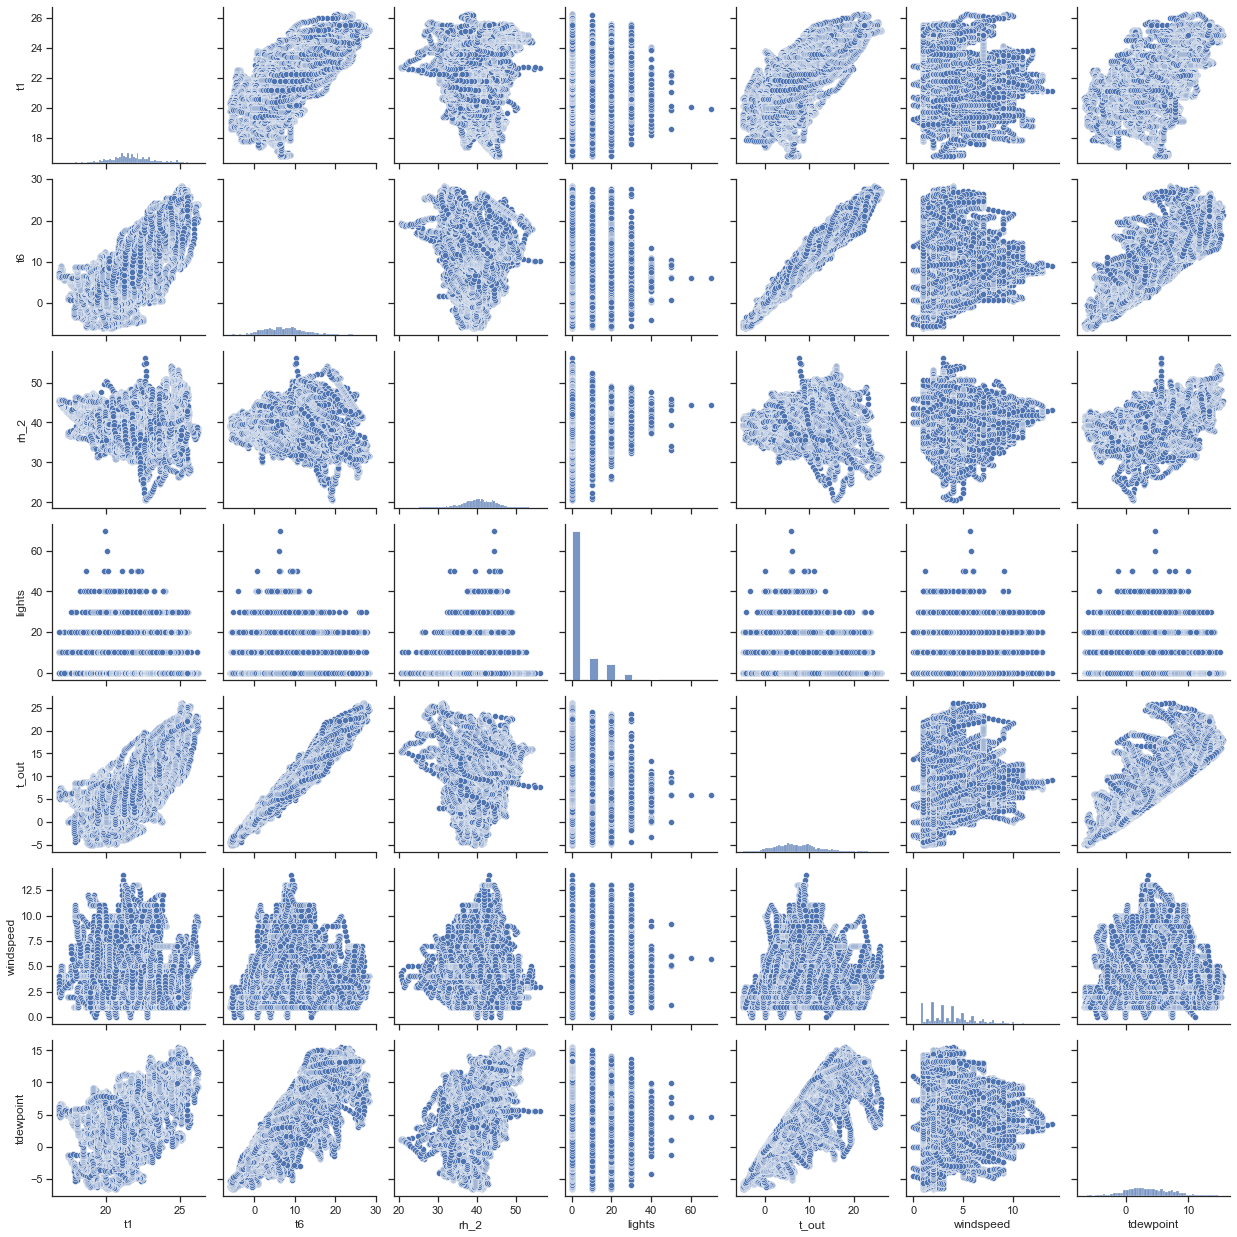

In [54]:
col = ["t1",'t6','rh_2','lights','t_out','windspeed','tdewpoint']
sns.set(style="ticks", color_codes=True)
sns.pairplot(df[col])
plt.show();

In [55]:
x = df.drop(['appliances'], axis=1)
y = df['appliances']

In [56]:
x.shape

(19718, 28)

In [57]:
y.shape

(19718,)

In [88]:
X = df.drop(['appliances','hour'],axis=1)
y= df['appliances']

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [90]:
print("X_train : ",x_train.shape)
print("y_train : ",y_train.shape)

print("X_test : ",x_test.shape)
print("y_test : ",y_test.shape)

X_train :  (15774, 16)
y_train :  (15774,)
X_test :  (3944, 16)
y_test :  (3944,)


In [91]:
from sklearn import linear_model

lin_model = linear_model.LinearRegression()
lin_model.fit(x_train,y_train)

LinearRegression()

In [92]:
pred = lin_model.predict(x_test)
pred

array([102.69675788, 126.91754529, 163.70356775, ..., 124.99744856,
        46.79190747, 176.19599957])

In [93]:
from sklearn import svm

svr_model = svm.SVR(gamma='scale')
svr_model.fit(x_train,y_train)

SVR()

In [94]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100,random_state=1)            
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

In [95]:
from sklearn.linear_model import Lasso
lass_reg = Lasso(alpha=0.1)
lass_reg.fit(x_train,y_train)

Lasso(alpha=0.1)

In [96]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(x_train, y_train)

Ridge(alpha=1, solver='cholesky')

In [97]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Function to evaluate the models
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    r_score = 100*r2_score(test_labels,predictions)
    accuracy = 100 - mape
    print(model,'\n')
    print('Average Error       : {:0.4f} degrees'.format(np.mean(errors)))
    print('Variance score R^2  : {:0.2f}%' .format(r_score))
    print('Accuracy            : {:0.2f}%\n'.format(accuracy))

In [98]:
evaluate(lin_model, x_test, y_test)
evaluate(svr_model, x_test, y_test)
evaluate(rf_model, x_test, y_test)
evaluate(lass_reg, x_test, y_test)
evaluate(ridge_reg, x_test, y_test)

LinearRegression() 

Average Error       : 51.5600 degrees
Variance score R^2  : 12.81%
Accuracy            : 35.39%

SVR() 

Average Error       : 44.1059 degrees
Variance score R^2  : -8.70%
Accuracy            : 64.07%

RandomForestRegressor(random_state=1) 

Average Error       : 31.1566 degrees
Variance score R^2  : 51.93%
Accuracy            : 66.98%

Lasso(alpha=0.1) 

Average Error       : 51.5527 degrees
Variance score R^2  : 12.82%
Accuracy            : 35.36%

Ridge(alpha=1, solver='cholesky') 

Average Error       : 51.5598 degrees
Variance score R^2  : 12.81%
Accuracy            : 35.39%

